<a href="https://colab.research.google.com/github/rameshbabulakshmanan84/Finance/blob/master/CreditRiskmodelling_with_CNN_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
#import the dataset
data=pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Credit-Risk-Model/master/train.csv')

In [56]:
data=data.drop('Unnamed: 0',axis=1)

In [57]:
data.columns.values

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

In [58]:
#replace yje '-' in the column heading 
x=data.columns.values
#replace'-' in the headings
col=[]
for i in x:
  temp=i.replace('-','')
  col.append(temp)
#print(col)
data.columns = col
print(data.columns.values)

['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime3059DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime6089DaysPastDueNotWorse'
 'NumberOfDependents']


In [59]:
#print the top 10 lines
data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [60]:
#Describe the data details
data[data.columns[1:]].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [61]:
target=data[data.columns[0]]
data=data[data.columns[1:]]

In [62]:
target.head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: SeriousDlqin2yrs, dtype: int64

In [63]:
data.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [64]:
#check null values
data.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime3059DaysPastDueNotWorse         0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime6089DaysPastDueNotWorse         0
NumberOfDependents                       3924
dtype: int64

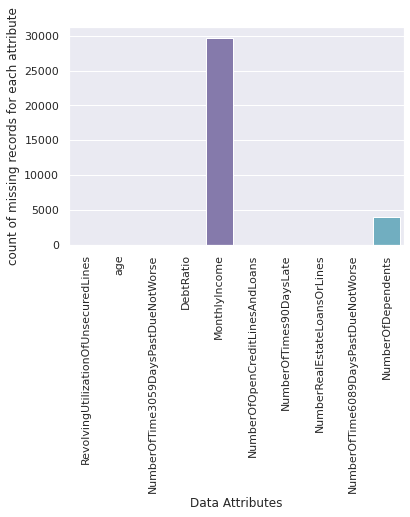

In [65]:
#graphical rep of the missiong values
x=data.columns
y=data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax=plt.gca()
#for p in ax.patches():
#  height=p.get_height()
#  ax.text(p.get_x()+p.get_width()/2.,height+2,int(height),fontsize=14,ha='center',va='bottom')
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show() 

In [66]:
#replace the missing value with median values
data.median()
#replace the missing  values with median value
data_updated=data.fillna(value=data.median())
#print
data_updated

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [67]:
#check the values of target variable
target.isnull().sum()

0

Text(0.5, 1.0, 'Data Distribution')

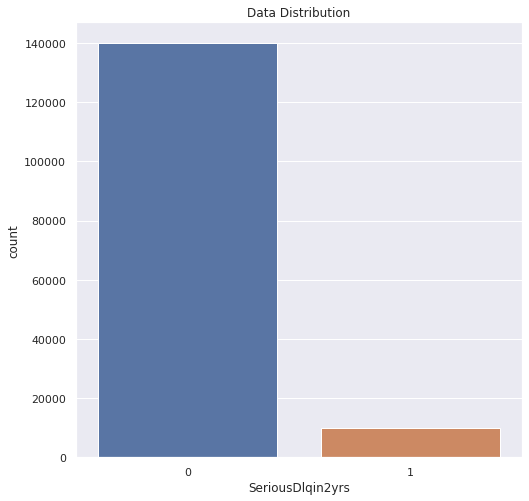

In [68]:
#check the data imbalances for target variables
target.value_counts()
#graphical representation
sns.set()
sns.countplot(target).set_title("Data Distribution")

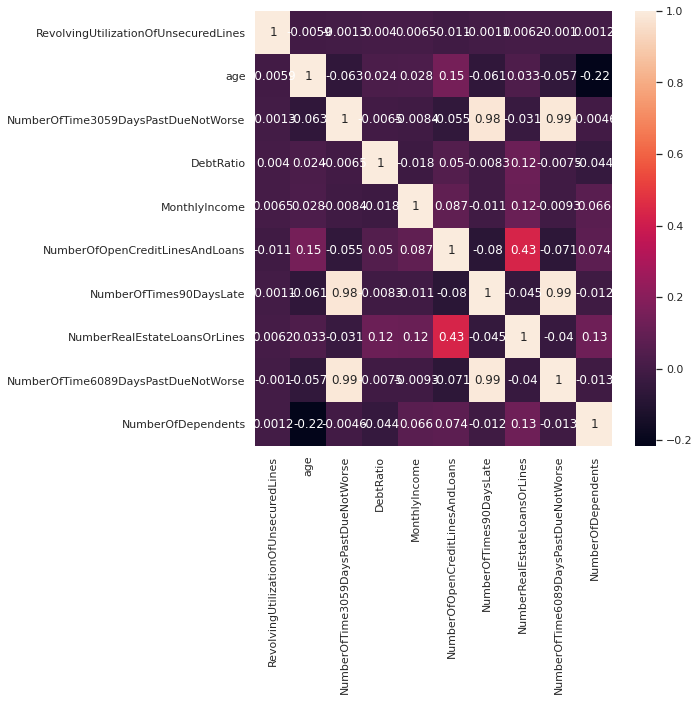

In [69]:
#use heat map to plot the correlation
sns.heatmap(data_updated.corr(),annot=True)
sns.set(font_scale=1.25)
plt.show()

Use Deep learning - 1D CNN and ADABOOST

In [70]:
#imkort keras libraries
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [71]:
data_updated.shape

(150000, 10)

In [72]:
data_updated.shape[1]

10

In [73]:
#split the dat into train and test data set
from sklearn.model_selection  import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data_updated,target,test_size=0.3,random_state=0)



In [74]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score,roc_auc_score,roc_curve,auc
import itertools
from sklearn.preprocessing import LabelBinarizer,label_binarize

In [75]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [76]:
#Define the function to plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization") 
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thres=cm.max()/2
  #itertools is used for efficient looping - it is cartesian product of two matrices
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color="white" if cm[i,j]> thres else "black") 
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.tight_layout()  

In [77]:
#define the function to plot the roc_auc _curve
def class_roc_auc_score(y_test,y_pred,avrage="micro"):
  lb=LabelBinarizer()
  lb.fit(y_test)
  y_test=lb.fit_transform(y_test)
  y_predict=lb.fit_transform(y_pred)
  return roc_auc_score(y_test,y_predict)

In [78]:
#split the dat into train and test data set
from sklearn.model_selection  import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data_updated,target,test_size=0.2,random_state=0)

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)

#before sampling display the count
print("Before SMOTE")
print("Count of Y_train with class 1: {}".format(sum(Y_Train==1)))
print("count of Y_Train with class 0:{}".format(sum(Y_Train==0)))

X_Train_SM,Y_Train_SM=sm.fit_sample(X_Train,Y_Train)

print("Look! that SMOTE Algorithm has oversampled the minority instances and made it equal to majority class.")
print("After SMOTE")
print("Count of Y_train with class 1: {}".format(sum(Y_Train_SM==1)))
print("count of Y_Train with class 0:{}".format(sum(Y_Train_SM==0)))

Before SMOTE
Count of Y_train with class 1: 7983
count of Y_Train with class 0:112017


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Look! that SMOTE Algorithm has oversampled the minority instances and made it equal to majority class.
After SMOTE
Count of Y_train with class 1: 112017
count of Y_Train with class 0:112017


In [79]:
#define the CNN model
def CNN(X_Train,X_Test,Y_Train,Y_Test):
  #Convert the Dataframe to NP arrays
  ##X_test=X_Test.to_numpy()
  
  num_classes=2
  batch_size=64
  epochs=10

  #define the input
  #convert the input dimenison to the form CCNN requires -> Batch size,Dim,# of channels.
  # [samples, time steps, features].
  X_train=X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1).astype('float32')
  X_test=X_Test.reshape(X_Test.shape[0],X_Test.shape[1],1).astype('float32')
  y_train1 = np_utils.to_categorical(Y_Train)
  y_test1=np_utils.to_categorical(Y_Test)

  #define the model
  model=Sequential()
  #create 32 filters with size 3 - convulution layer
  #increase the number of filters from 32 to 64
  model.add(Conv1D(filters=32,kernel_size=3,input_shape=(10,1)))
  #Create pooling layer
  model.add(MaxPooling1D(pool_size=3))
  #Flatten the layer
  model.add(Flatten())
  #add a dense layer
  model.add(Dense(512,activation='relu'))
  #add a output layer
  model.add(Dense(2,activation='softmax'))

  #print the summary of the model
  model.summary()

  #change the optimizer from rmsprop to 

  #compile the model
  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  #checkpoint creation
  checkpoint=ModelCheckpoint('/content/gdrive/My Drive/Finance/Creditrisk/CNN_Model.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

  #earlystop
  earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,restore_best_weights=True)

  #callbacks
  callbacks=[checkpoint,earlystop]
  
  #call the model
  history=model.fit(X_train,y_train1,batch_size=batch_size,epochs=epochs,callbacks=callbacks,validation_data=(X_test,y_test1),shuffle=True)

  #compute the score
  score=model.evaluate(X_test, y_test1, verbose=0)

  #print the scores
  print("Test loss:",score[0])
  print("Test accuracy:",score[1])

  history_dict=history.history
  loss_values=history_dict['loss']
  val_loss_values=history_dict['val_loss']
  train_acc=history_dict['accuracy']
  val_acc=history_dict['val_accuracy']

  epochs=range(1,len(loss_values)+1)

  #plot the training and validation loss
  line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
  line2=plt.plot(epochs,loss_values,label='Training loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.show()

  #plot the training and validation accuracy
  line1=plt.plot(epochs,val_acc,label="Validation Accuracy")
  line2=plt.plot(epochs,train_acc,label="Training Accuracy")
  plt.ylabel("Accuracy")
  plt.grid(True)
  plt.show()

  #Plot the confusion matrix
  y_pred=model.predict_classes(X_test)

  cnf_matrix=confusion_matrix(Y_Test,y_pred)
  np.set_printoptions(precision=2)
  plt.figure()
  plot_confusion_matrix(cnf_matrix,classes=['0','1'])

  #AUC_ROC curve
  auc1=class_roc_auc_score(Y_Test,y_pred)
  print('AUC for CNN:',auc1)
  y_score=model.predict_proba(X_test)
  n_classes=2
  fpr=dict()
  tpr=dict()
  roc_auc=dict()
  y_test1=label_binarize(y_test1,classes=[0,1])
  for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test1[:,1],y_score[:,1])
    roc_auc[i]=auc(fpr[i],tpr[i])
  colors = list(['blue', 'red'])

  #plot the curve for auc 
  for i, color in zip(range(n_classes),colors):
    plt.plot(fpr[i],tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
  plt.plot([0,1],[1,0],'k--')
  plt.xlim([-0.05,1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.title("ROC-AUC Curve")
  plt.legend(loc="lower right")
  plt.show()  

  #Print the classification report
  print("Classification Report")
  print(classification_report(Y_Test,y_pred))

In [80]:
#use the data sample from Smote for classifcation and prediction
#Call the function to run the model - Use updated 
#conver the tyuple to numpy array
import numpy as np
X_Train_SM=np.asarray(X_Train_SM)
Y_Train_SM=np.asarray(Y_Train_SM)
X_Test=X_Test.to_numpy()
Y_Test=Y_Test.to_numpy()
X_train=X_Train.to_numpy()
Y_train=Y_Train.to_numpy()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 8, 32)             128       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 1026      
Total params: 34,434
Trainable params: 34,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1849/1875 [============================>.] - ETA: 0s - loss: 15.4508 - accuracy: 0.8754
Epoch 00001: val

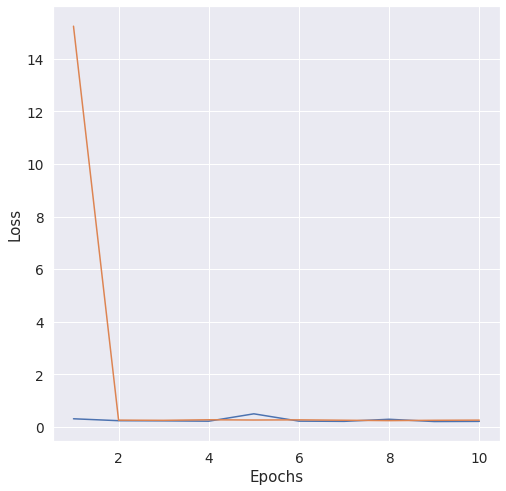

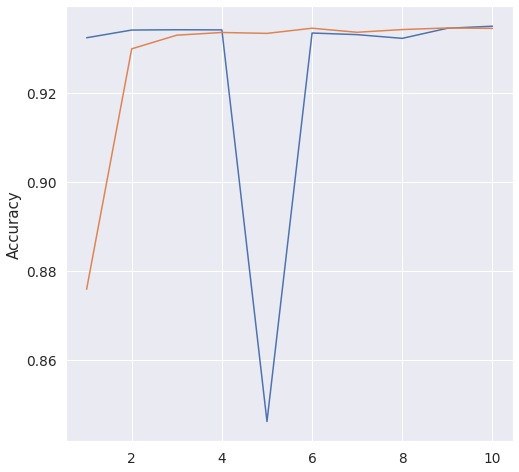

Confusion matrix without normalization
[[27792   165]
 [ 1787   256]]
AUC for CNN: 0.5597020009278987


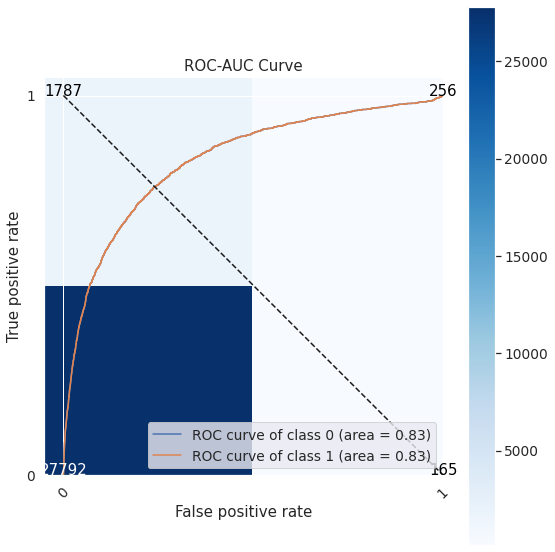

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27957
           1       0.61      0.13      0.21      2043

    accuracy                           0.93     30000
   macro avg       0.77      0.56      0.59     30000
weighted avg       0.92      0.93      0.91     30000



In [81]:
#Run with imbalance dataset and generate the report
CNN(X_train,X_Test,Y_train,Y_Test)

In [82]:
def CNN1(X_Train,X_Test,Y_Train,Y_Test):
  #Convert the Dataframe to NP arrays
  ##X_test=X_Test.to_numpy()
  
  num_classes=2
  batch_size=64
  epochs=10

  #define the input
  #convert the input dimenison to the form CCNN requires -> Batch size,Dim,# of channels.
  # [samples, time steps, features].
  X_train=X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1).astype('float32')
  X_test=X_Test.reshape(X_Test.shape[0],X_Test.shape[1],1).astype('float32')
  y_train1 = np_utils.to_categorical(Y_Train)
  y_test1=np_utils.to_categorical(Y_Test)

  #define the model
  model=Sequential()
  #create 32 filters with size 3 - convulution layer
  #increase the number of filters from 32 to 64
  model.add(Conv1D(filters=32,kernel_size=3,input_shape=(10,1)))
  #Create pooling layer
  model.add(MaxPooling1D(pool_size=3))
  #Flatten the layer
  model.add(Flatten())
  #add a dense layer
  model.add(Dense(512,activation='relu'))
  #add a output layer
  model.add(Dense(2,activation='sigmoid'))

  #print the summary of the model
  model.summary()

  #change the optimizer from rmsprop to 

  #compile the model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  
  #checkpoint creation
  checkpoint=ModelCheckpoint('/content/gdrive/My Drive/Finance/Creditrisk/CNN_Model.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

  #earlystop
  earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,restore_best_weights=True)

  #callbacks
  callbacks=[checkpoint,earlystop]
  
  #call the model
  history=model.fit(X_train,y_train1,batch_size=batch_size,epochs=epochs,callbacks=callbacks,validation_data=(X_test,y_test1),shuffle=True)

  #compute the score
  score=model.evaluate(X_test, y_test1, verbose=0)

  #print the scores
  print("Test loss:",score[0])
  print("Test accuracy:",score[1])

  history_dict=history.history
  loss_values=history_dict['loss']
  val_loss_values=history_dict['val_loss']
  train_acc=history_dict['accuracy']
  val_acc=history_dict['val_accuracy']

  epochs=range(1,len(loss_values)+1)

  #plot the training and validation loss
  line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
  line2=plt.plot(epochs,loss_values,label='Training loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.show()

  #plot the training and validation accuracy
  line1=plt.plot(epochs,val_acc,label="Validation Accuracy")
  line2=plt.plot(epochs,train_acc,label="Training Accuracy")
  plt.ylabel("Accuracy")
  plt.grid(True)
  plt.show()

  #Plot the confusion matrix
  y_pred=model.predict_classes(X_test)

  cnf_matrix=confusion_matrix(Y_Test,y_pred)
  np.set_printoptions(precision=2)
  plt.figure()
  plot_confusion_matrix(cnf_matrix,classes=['0','1'])

  #AUC_ROC curve
  auc1=class_roc_auc_score(Y_Test,y_pred)
  print('AUC for CNN:',auc1)
  y_score=model.predict_proba(X_test)
  n_classes=2
  fpr=dict()
  tpr=dict()
  roc_auc=dict()
  y_test1=label_binarize(y_test1,classes=[0,1])
  for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test1[:,1],y_score[:,1])
    roc_auc[i]=auc(fpr[i],tpr[i])
  colors = list(['blue', 'red'])

  #plot the curve for auc 
  for i, color in zip(range(n_classes),colors):
    plt.plot(fpr[i],tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
  plt.plot([0,1],[1,0],'k--')
  plt.xlim([-0.05,1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.title("ROC-AUC Curve")
  plt.legend(loc="lower right")
  plt.show()  

  #Print the classification report
  print("Classification Report")
  print(classification_report(Y_Test,y_pred))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 8, 32)             128       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 1026      
Total params: 34,434
Trainable params: 34,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1866/1875 [============================>.] - ETA: 0s - loss: 6.2904 - accuracy: 0.9244
Epoch 00001: val_

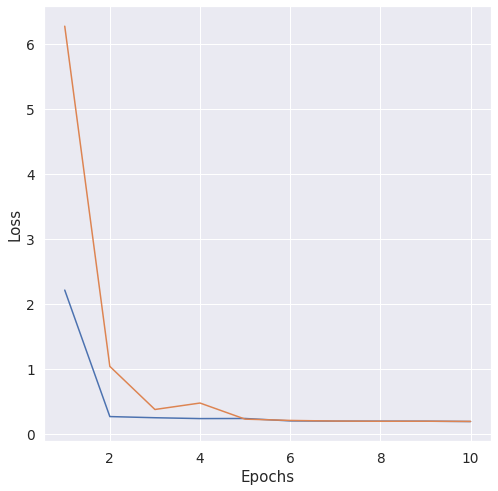

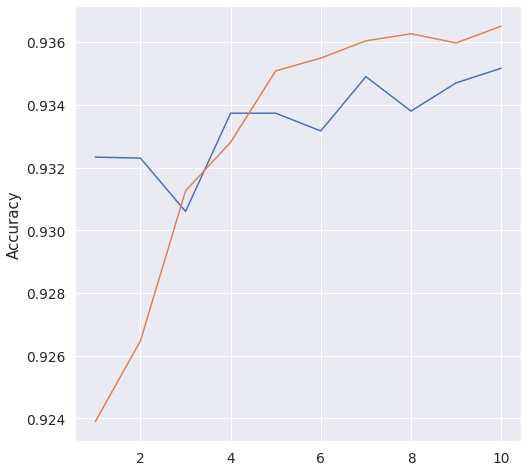

Confusion matrix without normalization
[[27729   228]
 [ 1717   326]]
AUC for CNN: 0.5757069397060737


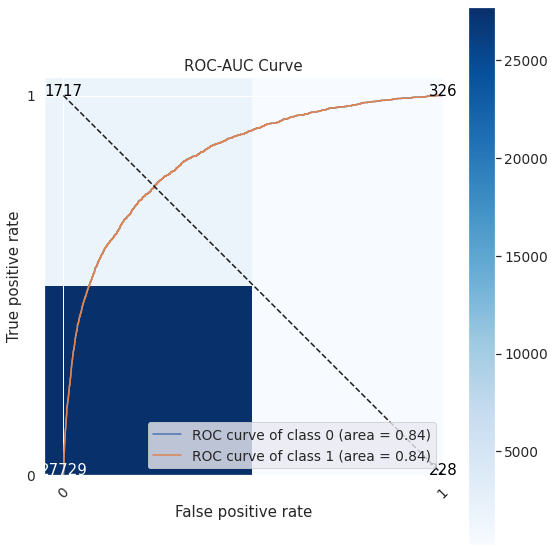

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27957
           1       0.59      0.16      0.25      2043

    accuracy                           0.94     30000
   macro avg       0.77      0.58      0.61     30000
weighted avg       0.92      0.94      0.92     30000



In [83]:
#Run with imbalance dataset and generate the report
#run with activation =sigmoid,optimizer = adam, loss=binary_Crossentropy
CNN1(X_train,X_Test,Y_train,Y_Test)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 8, 32)             128       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 1026      
Total params: 34,434
Trainable params: 34,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3491/3501 [============================>.] - ETA: 0s - loss: 7.3693 - accuracy: 0.6052
Epoch 00001: val_

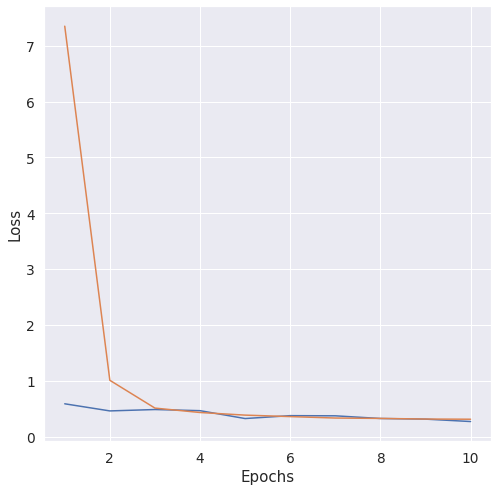

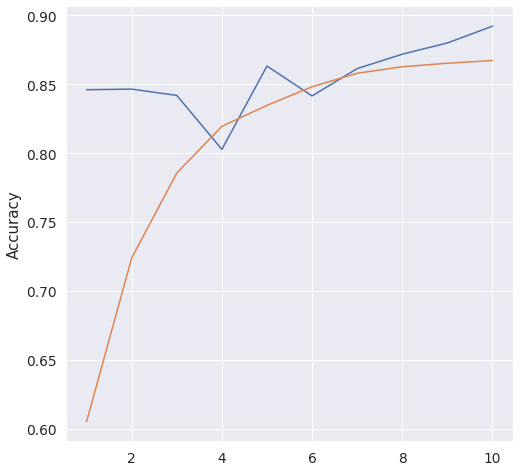

Confusion matrix without normalization
[[25722  2235]
 [ 1003  1040]]
AUC for CNN: 0.7145555553979819


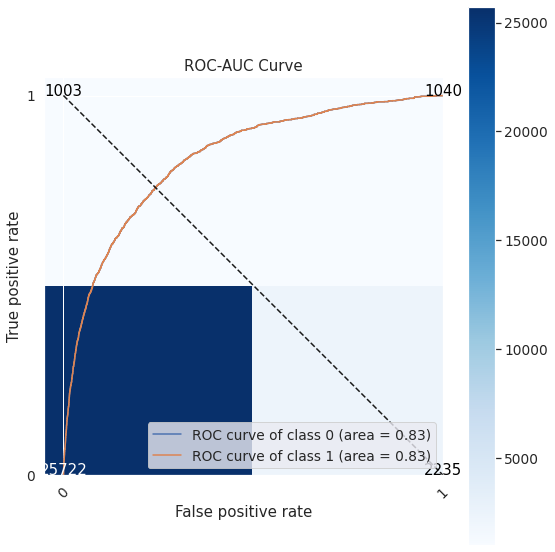

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     27957
           1       0.32      0.51      0.39      2043

    accuracy                           0.89     30000
   macro avg       0.64      0.71      0.67     30000
weighted avg       0.92      0.89      0.90     30000



In [84]:
#Run with imbalance dataset and generate the report
#run with activation =sigmoid,optimizer = adam, loss=binary_Crossentropy
CNN1(X_Train_SM,X_Test,Y_Train_SM,Y_Test)

In [89]:
def CNN2(X_Train,X_Test,Y_Train,Y_Test):
  #Convert the Dataframe to NP arrays
  ##X_test=X_Test.to_numpy()
  
  num_classes=2
  batch_size=64
  epochs=10

  #define the input
  #convert the input dimenison to the form CCNN requires -> Batch size,Dim,# of channels.
  # [samples, time steps, features].
  X_train=X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1).astype('float32')
  X_test=X_Test.reshape(X_Test.shape[0],X_Test.shape[1],1).astype('float32')
  y_train1 = np_utils.to_categorical(Y_Train)
  y_test1=np_utils.to_categorical(Y_Test)

  #define the model
  model=Sequential()
  #create 32 filters with size 3 - convulution layer
  #increase the number of filters from 32 to 64
  model.add(Conv1D(filters=32,kernel_size=3,input_shape=(10,1)))
  #Create pooling layer
  model.add(MaxPooling1D(pool_size=3))
  #Flatten the layer
  model.add(Flatten())
  #add a dense layer
  model.add(Dense(512,activation='relu'))
  #add a output layer
  model.add(Dense(2,activation='sigmoid'))

  #print the summary of the model
  model.summary()

  #change the optimizer from rmsprop to 

  #compile the model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  
  #checkpoint creation
  checkpoint=ModelCheckpoint('/content/gdrive/My Drive/Finance/Creditrisk/CNN_Model.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

  #earlystop
  earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,restore_best_weights=True)

  #callbacks
  callbacks=[checkpoint,earlystop]
  
  #call the model
  history=model.fit(X_train,y_train1,batch_size=batch_size,epochs=epochs,callbacks=callbacks,validation_data=(X_test,y_test1),shuffle=True)

  #compute the score
  score=model.evaluate(X_test, y_test1, verbose=0)

  #print the scores
  print("Test loss:",score[0])
  print("Test accuracy:",score[1])

  history_dict=history.history
  loss_values=history_dict['loss']
  val_loss_values=history_dict['val_loss']
  train_acc=history_dict['accuracy']
  val_acc=history_dict['val_accuracy']

  epochs=range(1,len(loss_values)+1)

  #plot the training and validation loss
  line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
  line2=plt.plot(epochs,loss_values,label='Training loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.show()

  #plot the training and validation accuracy
  line1=plt.plot(epochs,val_acc,label="Validation Accuracy")
  line2=plt.plot(epochs,train_acc,label="Training Accuracy")
  plt.ylabel("Accuracy")
  plt.grid(True)
  plt.show()

  

In [ ]:

  #plot the curve for auc 
  for i, color in zip(range(n_classes),colors):
    plt.plot(fpr[i],tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
  plt.plot([0,1],[1,0],'k--')
  plt.xlim([-0.05,1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.title("ROC-AUC Curve")
  plt.legend(loc="lower right")
  plt.show()  

 

In [ ]:
  #AUC_ROC curve
  auc1=class_roc_auc_score(Y_Test,y_pred)
  print('AUC for CNN:',auc1)
  y_score=model.predict_proba(X_test)
  n_classes=2
  fpr=dict()
  tpr=dict()
  roc_auc=dict()
  y_test1=label_binarize(y_test1,classes=[0,1])
  for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test1[:,1],y_score[:,1])
    roc_auc[i]=auc(fpr[i],tpr[i])
  colors = list(['blue', 'red'])


In [119]:
from keras.models import load_model

model1=load_model('/content/gdrive/My Drive/Finance/Creditrisk/CNN_Model.h5')

In [120]:
 X_test=X_Test.reshape(X_Test.shape[0],X_Test.shape[1],1).astype('float32')
 X_test.shape

(30000, 10, 1)

In [140]:
y_pred=model1.predict_proba(X_test)[:,1]
print(y_pred)
y_prediction=model1.predict_classes(X_test)
print("Before",y_prediction)
print("sum",sum(y_prediction))

for i in range(len(y_pred)):
  if y_pred[i] > 0.05:
    y_prediction[i]=1
print("After",y_prediction)
print("sum",sum(y_prediction))

[0.01 0.07 0.02 ... 0.01 0.12 0.01]
Before [0 0 0 ... 0 0 0]
sum 409
After [0 1 0 ... 0 1 0]
sum 9207


Confusion matrix without normalization
[[20391  7566]
 [  402  1641]]


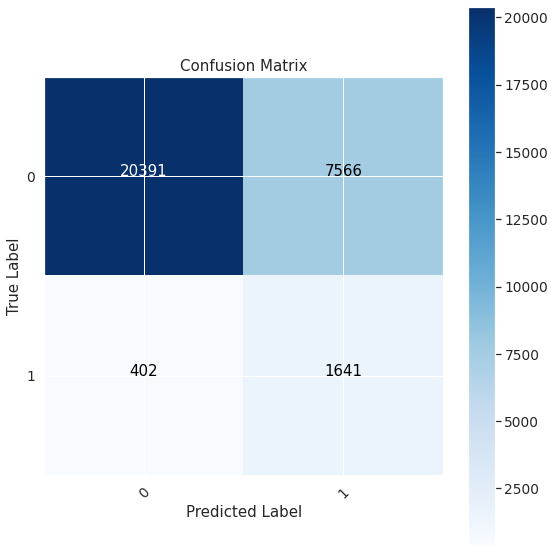

In [141]:
cnf_matrix=confusion_matrix(Y_Test,y_prediction)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['0','1'])

In [142]:
#Print the classification report
print("Classification Report")
print(classification_report(Y_Test,y_prediction))


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     27957
           1       0.18      0.80      0.29      2043

    accuracy                           0.73     30000
   macro avg       0.58      0.77      0.56     30000
weighted avg       0.93      0.73      0.80     30000

